In [17]:
# load pickle file
import pickle
import os
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('/mnt/vast-react/projects/agsinz_foundation_model_brain/goirik/Neuroformer')
sys.path.append('/mnt/vast-react/projects/agsinz_foundation_model_brain/goirik/Neuroformer/neuroformer')

from neuroformer.analysis import get_rates, calc_corr_psth
from neuroformer.utils import process_predictions

In [ ]:
base_path = "/mnt/vast-react/projects/agsinz_foundation_model_brain/goirik/Neuroformer/models/train_8_1_sec_beh/inference"
session = "dynamic29234-6-9-Video-021a75e56847d574b9acbcc06c675055_30hz"

pickle_file = 'results_trial_' + session + '.pkl'
result = pickle.load(open(pickle_file, 'rb'))

In [ ]:
# def binned_spike_count(spike_times, bin_size):
#     max_time = spike_times.max()
#     # rolling window binning
#     bins = np.arange(0, max_time + bin_size, bin_size)
#     counts, _ = np.histogram(spike_times, bins=bins)
#     return counts, bins

In [4]:
if isinstance(result['true'][0], torch.Tensor):
    true = [x.item() for x in result['true']]
    result['true'] = true

for key in result.keys():
    print(key, len(result[key]), type(result[key][0]), result[key])

true 90394 <class 'int'> [8053, 8062, 8082, 8084, 8084, 8084, 8087, 8089, 8098, 8114, 8114, 8114, 8118, 8121, 8127, 8127, 8129, 8144, 8162, 8188, 8188, 8192, 8239, 8239, 8244, 8250, 8254, 8272, 8286, 7879, 7879, 7895, 7966, 7984, 8011, 8054, 8064, 8072, 8072, 8077, 8079, 8138, 8144, 8157, 8157, 8158, 8174, 8174, 8177, 8205, 8230, 8241, 8241, 8256, 8265, 8280, 8283, 8286, 8105, 8105, 8105, 8105, 8105, 8105, 8110, 8117, 8166, 8182, 8183, 8183, 8183, 8187, 8196, 8198, 8199, 8199, 8230, 8236, 8255, 8259, 8262, 8262, 8262, 8267, 8275, 8281, 8286, 8184, 8184, 8184, 8184, 8184, 8184, 8184, 8184, 8184, 8207, 8208, 8221, 8225, 8236, 8236, 8245, 8247, 8247, 8248, 8249, 8250, 8257, 8262, 8262, 8271, 8276, 8279, 8279, 8286, 8149, 8149, 8152, 8159, 8159, 8161, 8199, 8205, 8211, 8211, 8211, 8216, 8216, 8220, 8220, 8220, 8220, 8220, 8221, 8221, 8231, 8232, 8232, 8242, 8267, 8269, 8278, 8278, 8286, 8046, 8046, 8058, 8058, 8058, 8058, 8089, 8092, 8092, 8097, 8106, 8106, 8106, 8106, 8106, 8106, 8122, 81

In [5]:
len(set(result["true"]).union(set(result["true"]))), len(set(result["true"]))

(513, 513)

In [ ]:
tokenizer_path = base_path + "/tokenizer.pkl"
with open(tokenizer_path, "rb") as f:    
    token = pickle.load(f)

tokenizer = token[session]
df_pred, df_true = process_predictions(result, tokenizer.stoi, tokenizer.itos, 0)


In [7]:
rates_true = get_rates(df_true, list(set(result["true"]).union(set(result["true"]))), result['Interval'])
rates = get_rates(df_pred, list(set(result["true"]).union(set(result["true"]))), result['Interval'])

/mnt/vast-react/projects/agsinz_foundation_model_brain/goirik/Neuroformer/neuroformer/analysis.py:56: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df = df.groupby(["ID", interval]).count().unstack(fill_value=0).stack()["Time"]
/mnt/vast-react/projects/agsinz_foundation_model_brain/goirik/Neuroformer/neuroformer/analysis.py:56: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df = df.groupby(["ID", interval]).count().unstack(fill_value=0).stack()["Time"]


In [8]:
df_corr = calc_corr_psth(rates_true, rates, list(set(result["true"]).union(set(result["true"]))))

/mnt/vast-react/projects/agsinz_foundation_model_brain/goirik/Neuroformer/neuroformer/analysis.py:82: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, p = stats.pearsonr(


In [9]:
num_nans = np.isnan(df_corr["pearson_r"].to_numpy()).sum().item()
num_all = len(df_corr["pearson_r"].to_numpy())
print(f"The number of total neurons is: {num_all}")
print(f"The number of NaN in the pearson correlation is: {num_nans}")


The number of total neurons is: 513
The number of NaN in the pearson correlation is: 142


In [11]:
arr = df_corr["pearson_r"].to_numpy()
arr = arr[~np.isnan(arr)]
arr.min(), arr.max(), arr.mean(), 

(np.float32(-0.026557667), np.float32(0.14294592), np.float32(0.00037451414))

In [15]:
df_corr.sort_values(by=['pearson_r'], ascending=False)

pearson_r      pearson_p
7990   0.142946   0.000000e+00
8149   0.105985  1.994364e-216
8053   0.097201  3.296030e-182
8261   0.064320   1.113683e-80
8213   0.061004   9.517543e-73
...         ...            ...
7997        NaN            NaN
8000        NaN            NaN
8003        NaN            NaN
8016        NaN            NaN
8042        NaN            NaN

[513 rows x 2 columns]

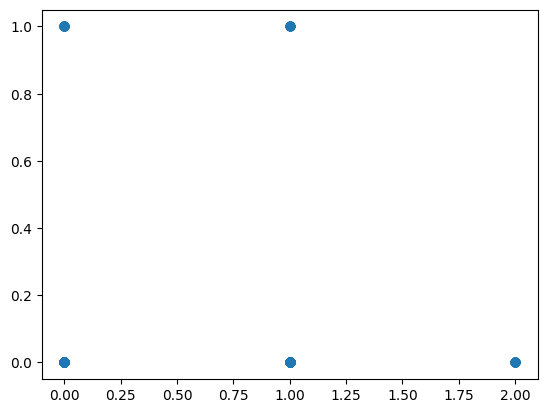

In [16]:
import matplotlib.pyplot as plt

# plt.plot(rates_true[8232], c='b')
# plt.plot(rates[8232], c='g')
plt.scatter(rates_true[7990], rates[7990])

In [67]:
df_corr["pearson_r"].to_numpy()

array([ 3.06499273e-01,  1.80546060e-01,  9.17713791e-02,  7.84356445e-02,
        7.69584551e-02,  7.27494657e-02,  7.22622052e-02,  5.97700141e-02,
        5.94717339e-02,  5.91854155e-02,  5.29870242e-02,  4.98552397e-02,
        4.89353463e-02,  4.80195731e-02,  4.75883074e-02,  4.71208654e-02,
        3.92970070e-02,  3.91134806e-02,  3.81599292e-02,  3.69988568e-02,
        3.66780832e-02,  3.65082584e-02,  3.50724086e-02,  3.46116126e-02,
        3.42631601e-02,  3.40980552e-02,  3.38720009e-02,  3.33988890e-02,
        3.20312977e-02,  2.93855853e-02,  2.92704031e-02,  2.80637667e-02,
        2.77544875e-02,  2.73306761e-02,  2.73028407e-02,  2.66631003e-02,
        2.60682274e-02,  2.47288719e-02,  2.44608298e-02,  2.31760778e-02,
        2.31063832e-02,  2.28448827e-02,  2.24998873e-02,  2.22578738e-02,
        2.22338550e-02,  2.21419688e-02,  2.16955189e-02,  2.14519426e-02,
        2.11367495e-02,  2.07736194e-02,  2.04127170e-02,  2.03412846e-02,
        2.00054068e-02,  

In [ ]:
rates_true[7981]
